# Part 4 Clustering

- K-Means
- Hierarchical Clustering

### K-Means
- STEP 1: Choose the number K of clusters
- STEP 2: Select at random K points, the centroids (not necessarily from your dataset)
- STEP 3: Assign each data point to the closest centroid => That forms K clusters
- STEP 4: Compute and place the new centroid for each cluster
- STEP 5: Reassign each data point the closest centroid. If any reassigment took place, go to STEP 4, otherwise go to FIN.

** To avoid Random Initialization Trap use K-means++ init algorithm

Metric to choose right number of clusters - WCSS

In [1]:
# import generic libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams['figure.dpi'] = 150

# import dataset
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:, [3,4]].values

# using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

<Figure size 960x720 with 1 Axes>

In [2]:
# Applying k-means to the mail dataset
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

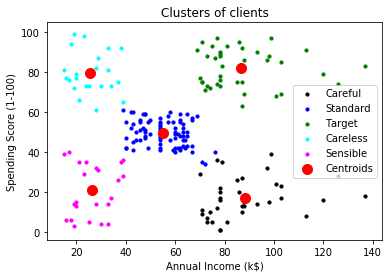

In [3]:
# Visualising the clusters
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=10, c='black', label='Careful')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=10, c='b', label='Standard')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=10, c='g', label='Target')
plt.scatter(X[y_kmeans==3, 0], X[y_kmeans==3, 1], s=10, c='cyan', label='Careless')
plt.scatter(X[y_kmeans==4, 0], X[y_kmeans==4, 1], s=10, c='magenta', label='Sensible')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red', label='Centroids')
plt.title('Clusters of clients')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(loc=0)
plt.show()

### Hierarchical Clustering
- Agglomerative
- Divisive

#### Agglomerative:
- STEP 1: Make each data point a single-point cluster -> That forms N clusters;
- STEP 2: Take the two closest data points and make them one cluster -> That forms N-1 clusters;
- STEP 3: Take the two closest clusters and make them one cluster -> That forms N-2 clusters;
- STEP 4: Repeat STEP 3 until there is only one cluster
- * Build and use Dendogram to evaluate (dendogram is COOL) (Add threshold - how many vertical lines crosses such many clusters will be). The longest vertical that doesn't cross any horizontal line.

In [23]:
# import generic libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams['figure.dpi'] = 200

# import dataset
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:, [3,4]].values

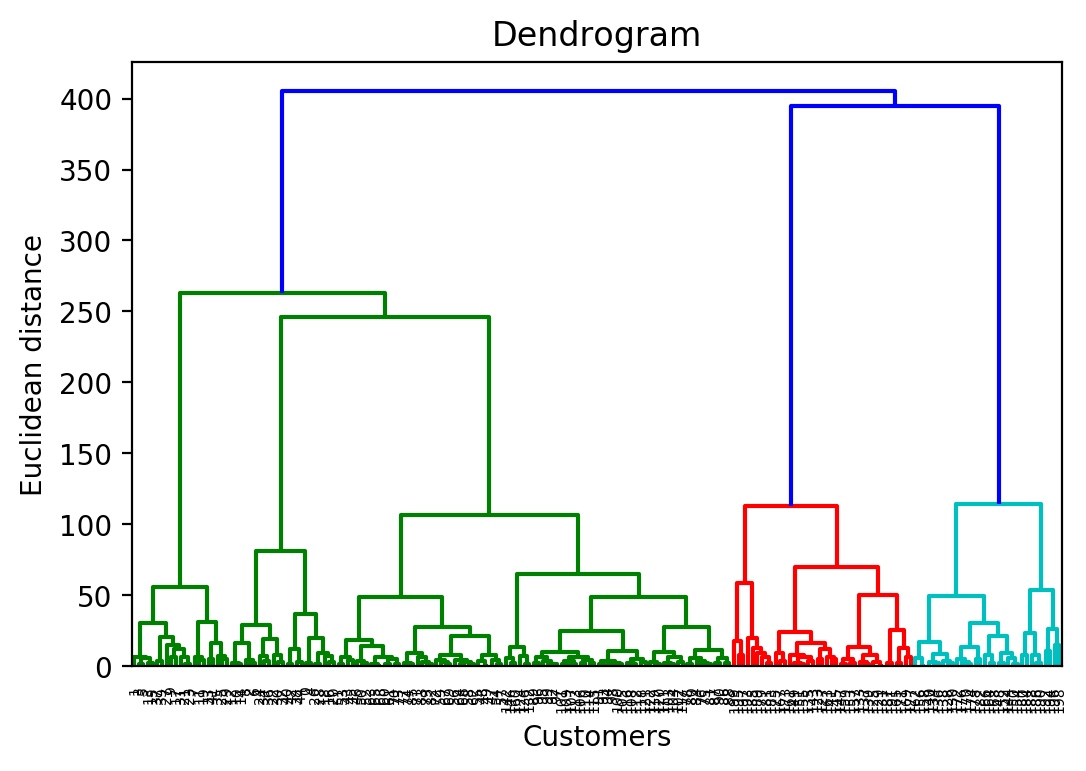

In [24]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distance')
plt.show()
# output - optimal number of clusters = 5. Will be used later

In [25]:
# Fitting hierarchical clustering to the mall dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)

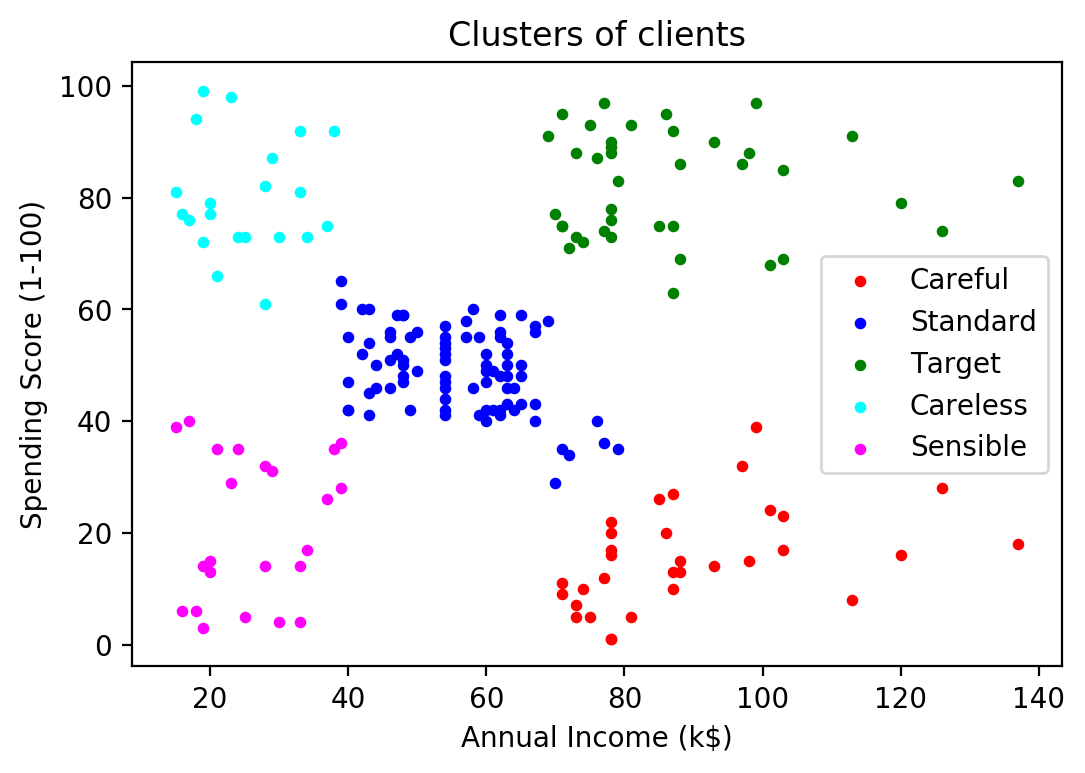

In [26]:
# Visualising the clusters in 2D only
plt.scatter(X[y_hc==0, 0], X[y_hc==0, 1], s=10, c='red', label='Careful')
plt.scatter(X[y_hc==1, 0], X[y_hc==1, 1], s=10, c='b', label='Standard')
plt.scatter(X[y_hc==2, 0], X[y_hc==2, 1], s=10, c='g', label='Target')
plt.scatter(X[y_hc==3, 0], X[y_hc==3, 1], s=10, c='cyan', label='Careless')
plt.scatter(X[y_hc==4, 0], X[y_hc==4, 1], s=10, c='magenta', label='Sensible')
plt.title('Clusters of clients')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(loc=0)
plt.show()